Data loading, pre-processing and representation
---



In [4]:
#adding libraries
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
import csv          
import requests     
import numpy as np  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import pandas

In [5]:
my_dataset = pd.read_csv('diabetes.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Datatype matching

In [6]:
# In the dataset there are no categorical feature, therefore, datatypes don't need to be changed
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


###Representing and analysing data about the dataset

In [7]:

print(my_dataset.describe())
print(my_dataset.info()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

You can see above that there are two data objects in the dataset with missing values for the attributes "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g". To obtain the values, we replace the missing values by the mean value of the attribute


###Replacing missing values

In [8]:
#In our dataset neither object misses a feature, so the functions for willing blanks are not needed
#On the other hand there are some outliers which are replaced with the mean values
my_dataset['BloodPressure'].replace(0, my_dataset['BloodPressure'].mean(), inplace=True)
my_dataset['SkinThickness'].replace(0, my_dataset['SkinThickness'].mean(), inplace=True)
my_dataset['BMI'].replace(0, my_dataset['BMI'].mean(), inplace=True)
print(my_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None


In [9]:
#For attributes of categorical type, the values are checked against possible values
print(my_dataset['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [10]:
#Creating a dataset where labels are excluded leaving feature columns only
clustering_dataset = my_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

### Data normalization

In [11]:
#Data normalisation is applied for four attributes to make the data more consistent
my_dataset['Pregnancies'] = (my_dataset['Pregnancies'] - my_dataset['Pregnancies'].min())/(my_dataset['Pregnancies'].max() - my_dataset['Pregnancies'].min())
my_dataset['Glucose'] = (my_dataset['Glucose'] - my_dataset['Glucose'].min())/(my_dataset['Glucose'].max() - my_dataset['Glucose'].min())
my_dataset['BloodPressure'] = (my_dataset['BloodPressure'] - my_dataset['BloodPressure'].min())/(my_dataset['BloodPressure'].max() - my_dataset['BloodPressure'].min())
my_dataset['SkinThickness'] = (my_dataset['SkinThickness'] - my_dataset['SkinThickness'].min())/(my_dataset['SkinThickness'].max() - my_dataset['SkinThickness'].min())
my_dataset['Insulin'] = (my_dataset['Insulin'] - my_dataset['Insulin'].min())/(my_dataset['Insulin'].max() - my_dataset['Insulin'].min())
my_dataset['BMI'] = (my_dataset['BMI'] - my_dataset['BMI'].min())/(my_dataset['BMI'].max() - my_dataset['BMI'].min())
my_dataset['DiabetesPedigreeFunction'] = (my_dataset['DiabetesPedigreeFunction'] - my_dataset['DiabetesPedigreeFunction'].min())/(my_dataset['DiabetesPedigreeFunction'].max() - my_dataset['DiabetesPedigreeFunction'].min())
my_dataset['Age'] = (my_dataset['Age'] - my_dataset['Age'].min())/(my_dataset['Age'].max() - my_dataset['Age'].min())
print(my_dataset.head(10))
print(my_dataset.describe())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.489796       0.304348  0.000000  0.314928   
1     0.058824  0.427136       0.428571       0.239130  0.000000  0.171779   
2     0.470588  0.919598       0.408163       0.147135  0.000000  0.104294   
3     0.058824  0.447236       0.428571       0.173913  0.111111  0.202454   
4     0.000000  0.688442       0.163265       0.304348  0.198582  0.509202   
5     0.294118  0.582915       0.510204       0.147135  0.000000  0.151329   
6     0.176471  0.391960       0.265306       0.271739  0.104019  0.261759   
7     0.588235  0.577889       0.460260       0.147135  0.000000  0.349693   
8     0.117647  0.989950       0.469388       0.413043  0.641844  0.251534   
9     0.470588  0.628141       0.734694       0.147135  0.000000  0.282057   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667      

# Data Visualization

C:\Users\lilam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


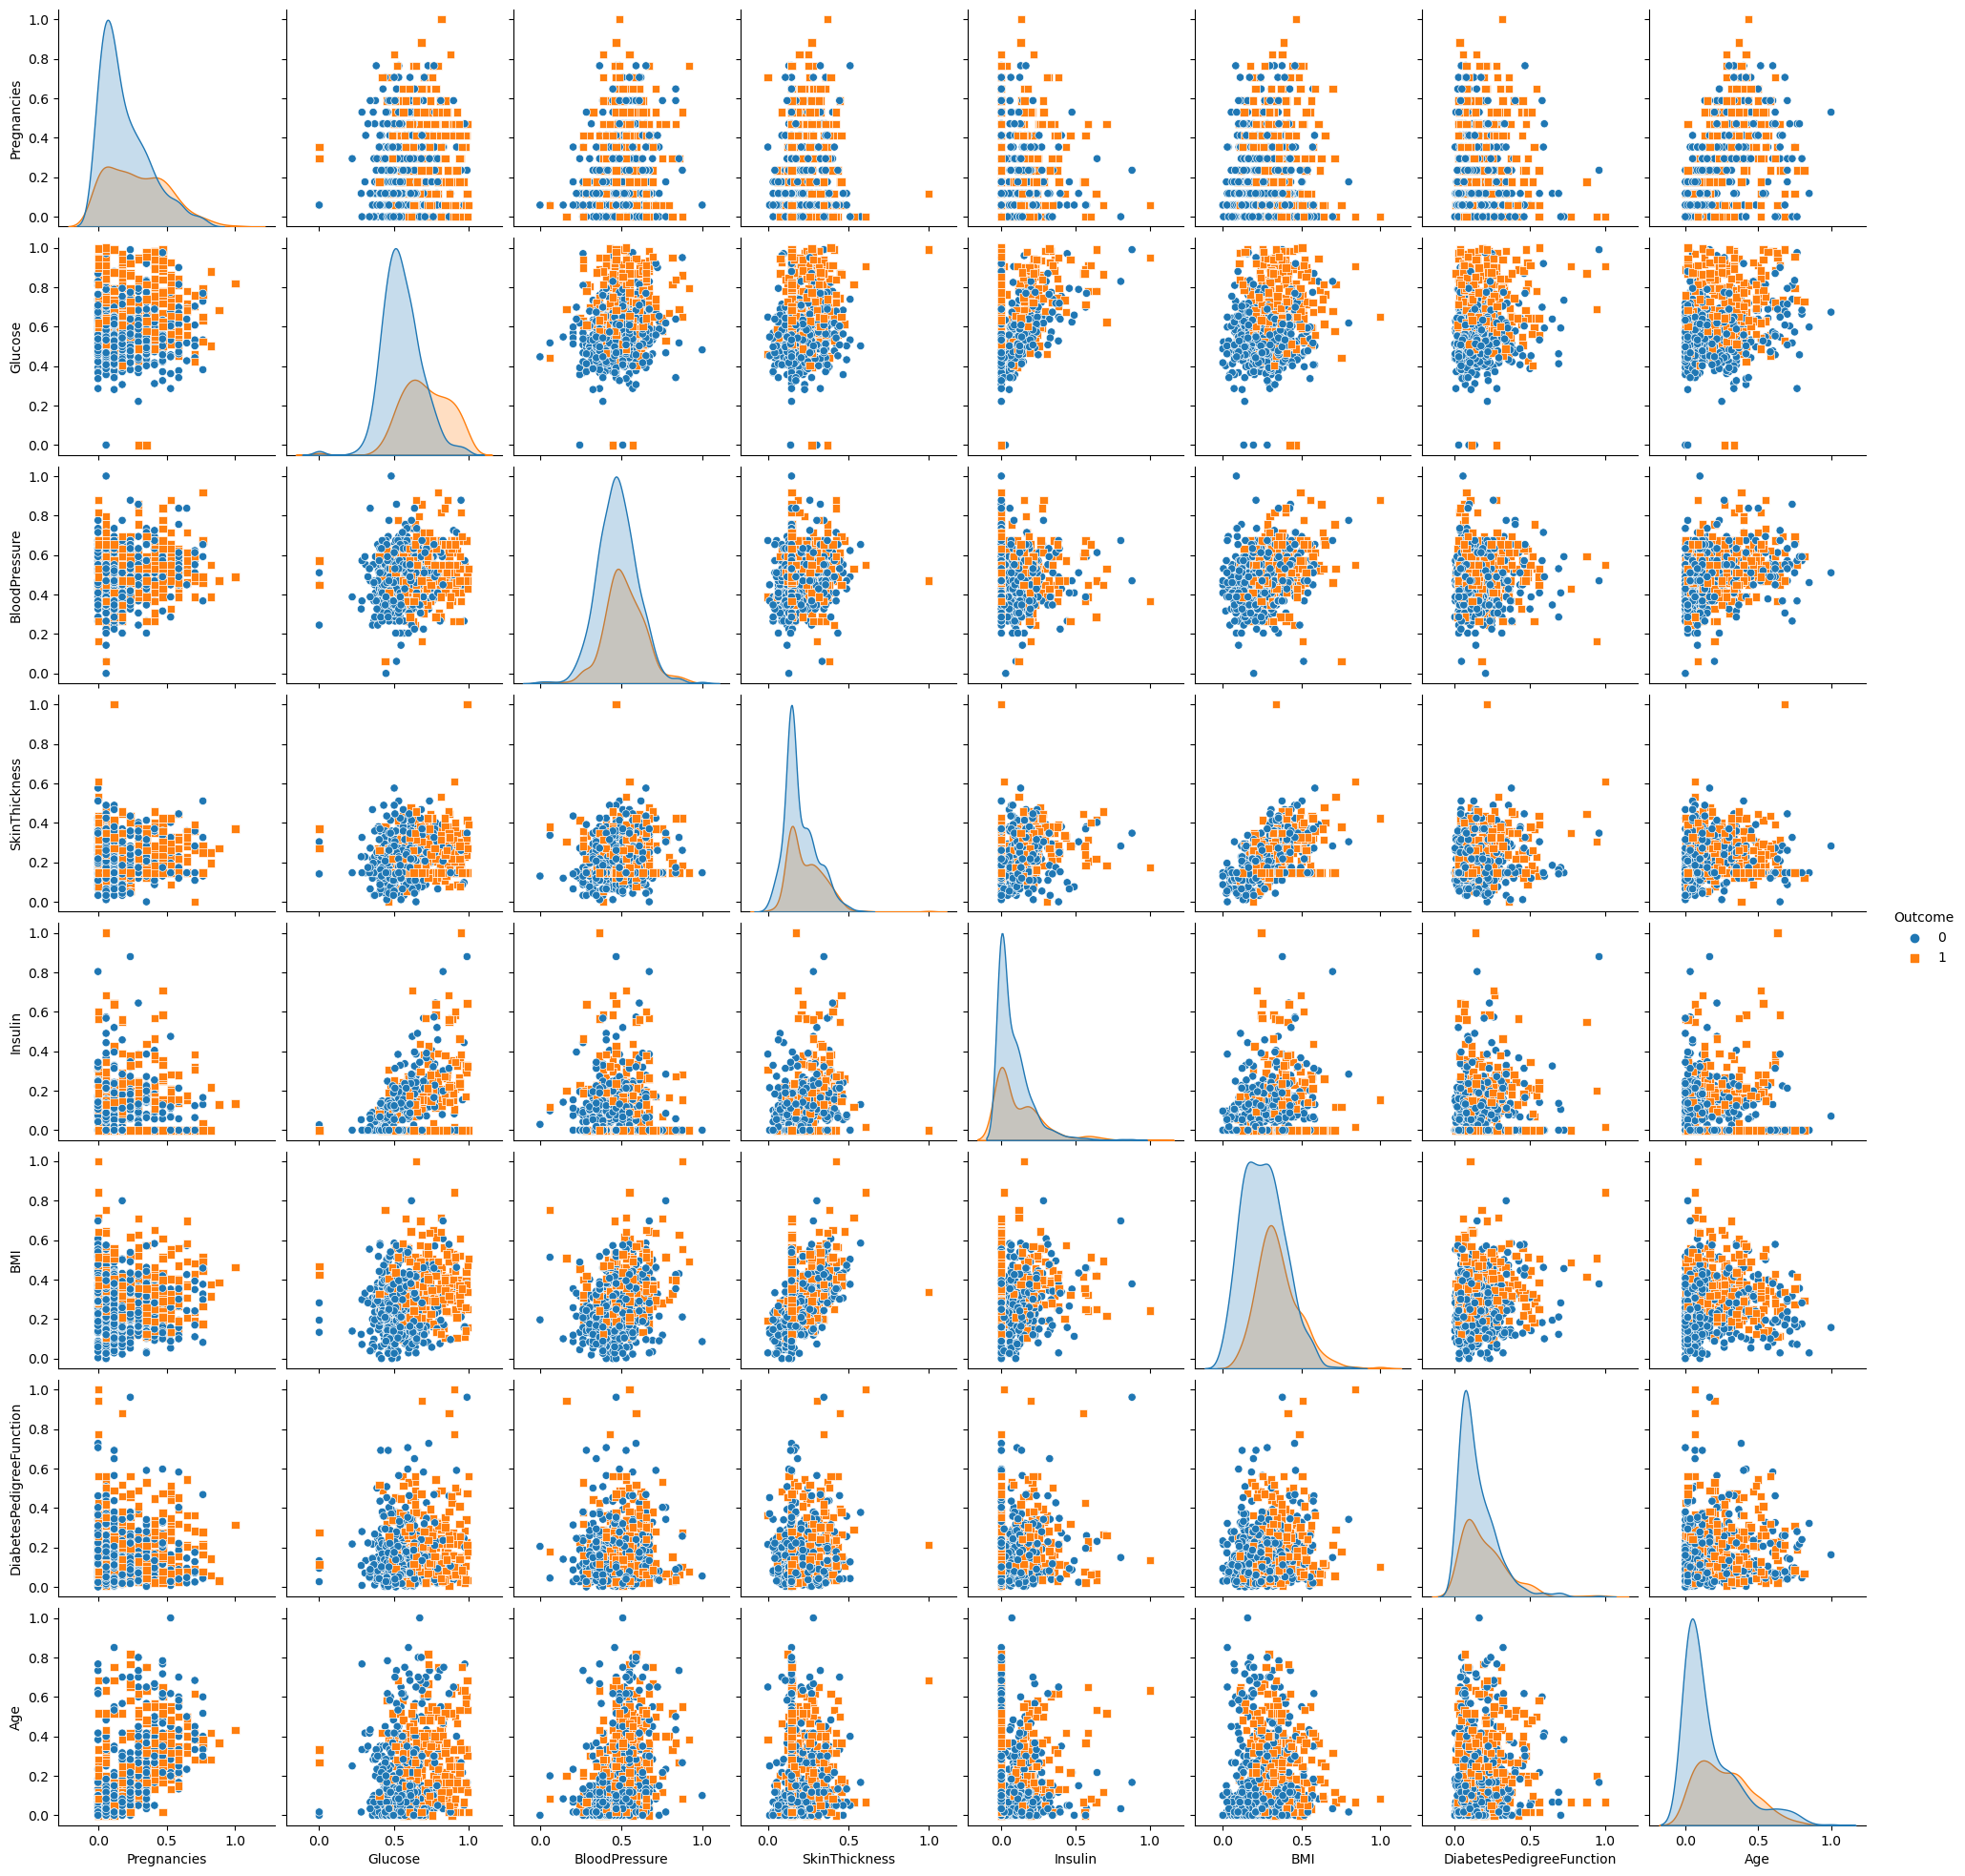

In [12]:
sns.pairplot(my_dataset, hue='Outcome', diag_kind='kde', markers=['o', 's'])
plt.show()

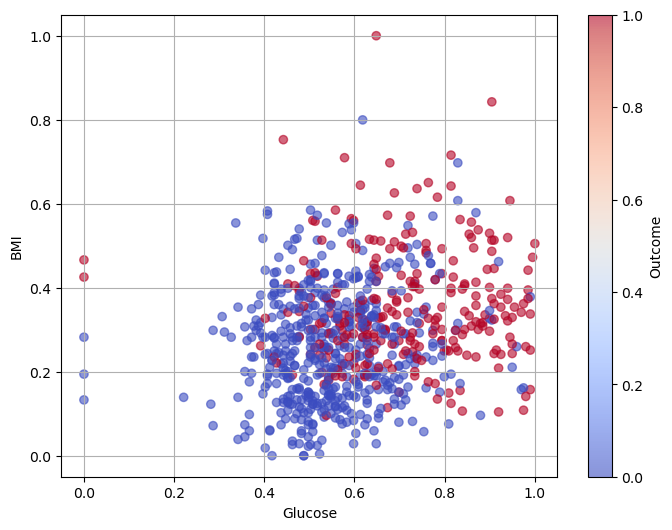

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(my_dataset['Glucose'], my_dataset['BMI'], c=my_dataset['Outcome'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

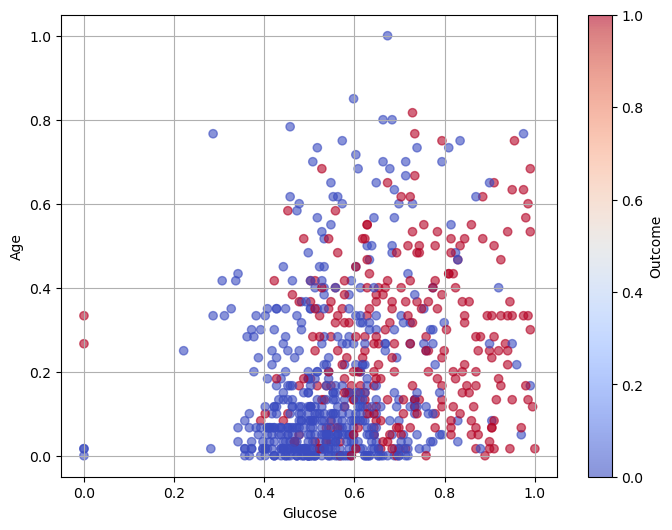

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(my_dataset['Glucose'], my_dataset['Age'], c=my_dataset['Outcome'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.colorbar(label='Outcome')
plt.grid(True)
plt.show()

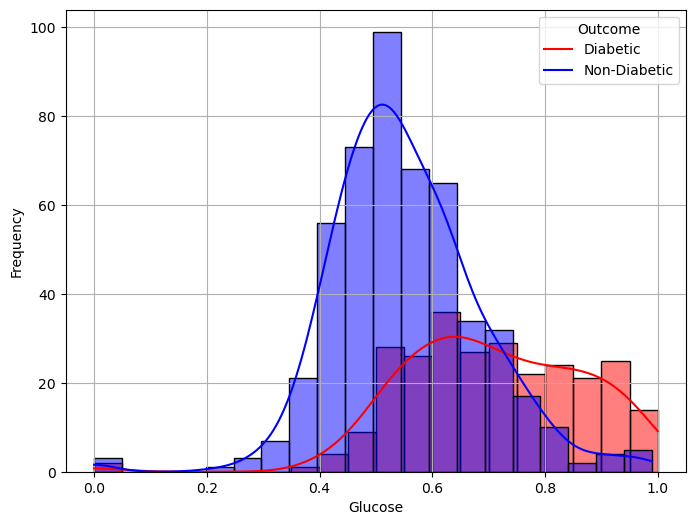

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(my_dataset[my_dataset['Outcome'] == 1]['Glucose'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(my_dataset[my_dataset['Outcome'] == 0]['Glucose'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.grid(True)
plt.show()

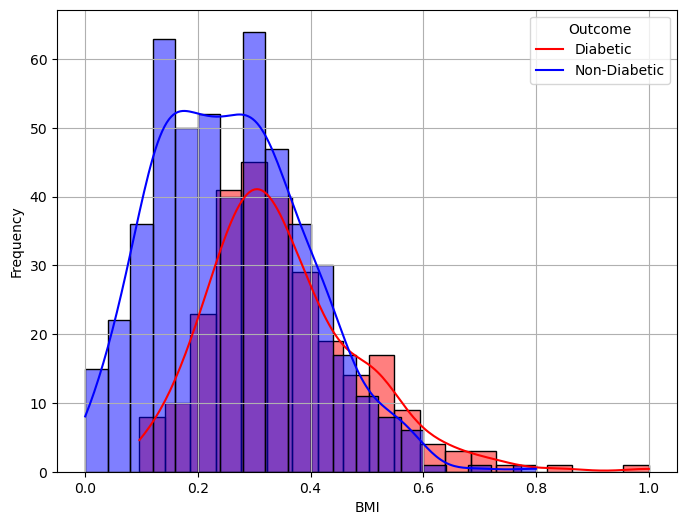

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(my_dataset[my_dataset['Outcome'] == 1]['BMI'], kde=True, color='red', label='Diabetic', bins=20)
sns.histplot(my_dataset[my_dataset['Outcome'] == 0]['BMI'], kde=True, color='blue', label='Non-Diabetic', bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Diabetic', 'Non-Diabetic'])
plt.grid(True)
plt.show()

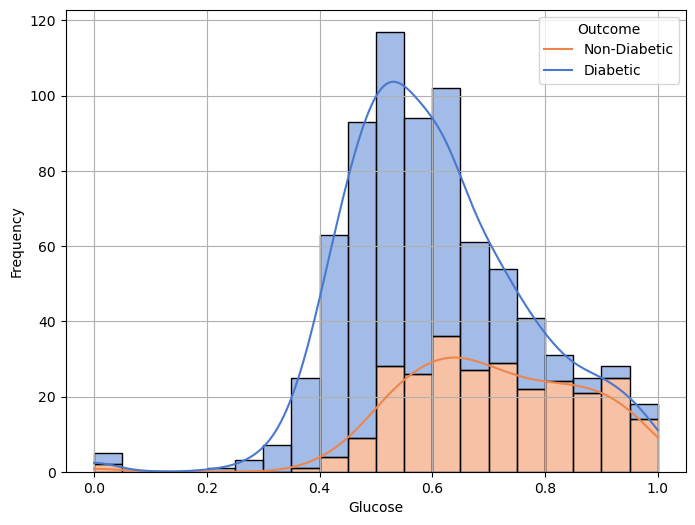

In [17]:
feature1 = 'Glucose'

bins = 20

plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x=feature1, hue='Outcome', kde=True, bins=bins, palette='muted', multiple='stack')
plt.xlabel(feature1)
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

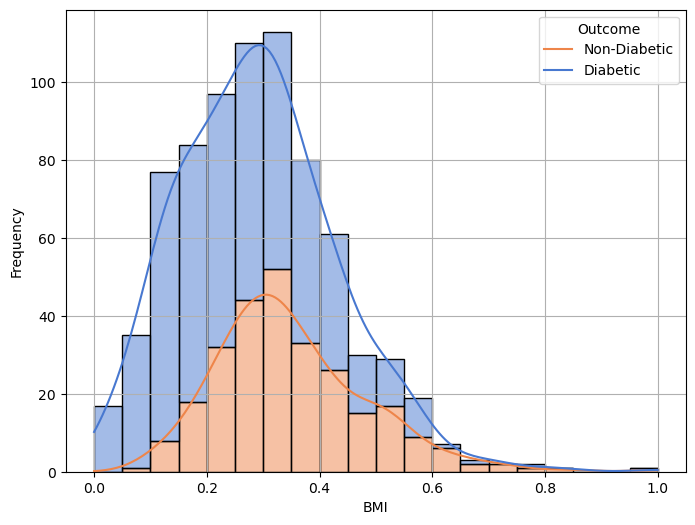

In [18]:
feature2 = 'BMI'

bins = 20

plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x=feature2, hue='Outcome', kde=True, bins=bins, palette='muted', multiple='stack')
plt.xlabel(feature2)
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.grid(True)
plt.show()

In [19]:
glucose_bmi = np.corrcoef(my_dataset['Glucose'], my_dataset['BMI'])[0, 1]
glucose_age = np.corrcoef(my_dataset['Glucose'], my_dataset['Age'])[0, 1]
print("Glucose and BMI correlation:", glucose_bmi)
print("Glucose and Age correlation:", glucose_age)

Glucose and BMI correlation: 0.2188139780359938
Glucose and Age correlation: 0.2635143198243336


In [20]:
features = my_dataset.columns[:-1]
stats_dict = {}
for i in features:
    
    mean_value = np.mean(my_dataset[i])
    median_value = np.median(my_dataset[i])
    std_value = np.std(my_dataset[i])
    stats_dict[i] = {'Mean': mean_value,'Median': median_value,'Standard Deviation': std_value,}

for j, stats in stats_dict.items():
    print(f"Statistical Indicators for '{j}':")
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")
    print()


Statistical Indicators for 'Pregnancies':
Mean: 0.22617953431372548
Median: 0.17647058823529413
Standard Deviation: 0.19808138896523542

Statistical Indicators for 'Glucose':
Mean: 0.6075102072864321
Median: 0.5879396984924623
Standard Deviation: 0.1605617884834308

Statistical Indicators for 'BloodPressure':
Mean: 0.49239598488321107
Median: 0.4897959183673469
Standard Deviation: 0.12355143931203286

Statistical Indicators for 'SkinThickness':
Mean: 0.21311390457521892
Median: 0.17391304347826086
Standard Deviation: 0.1046192209709004

Statistical Indicators for 'Insulin':
Mean: 0.09432562549251379
Median: 0.03605200945626477
Standard Deviation: 0.13613350976911662

Statistical Indicators for 'BMI':
Mean: 0.29142750829112885
Median: 0.28220858895705525
Standard Deviation: 0.14050911850225312

Statistical Indicators for 'DiabetesPedigreeFunction':
Mean: 0.16817946288784516
Median: 0.12574722459436377
Standard Deviation: 0.1413803655117972

Statistical Indicators for 'Age':
Mean: 0.2040

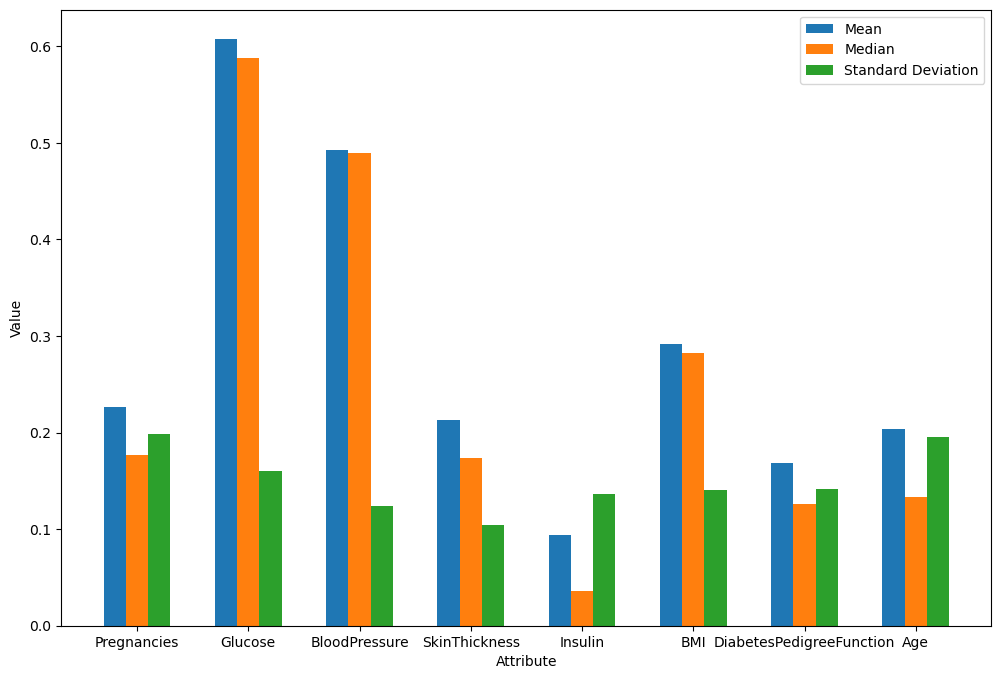

In [21]:

attributes = list(stats_dict.keys())
stats_names = list(stats_dict[attributes[0]].keys())

num_attributes = len(attributes)
num_stats = len(stats_names)

bar_width = 0.2

index = np.arange(num_attributes)

plt.figure(figsize=(12, 8))

for i, stat_name in enumerate(stats_names):
    stat_values = [stats_dict[attr][stat_name] for attr in attributes]
    plt.bar(index + i * bar_width, stat_values, bar_width, label=stat_name)

plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(index + (num_stats - 1) * bar_width / 2, attributes)
plt.legend()
plt.show()

&nbsp;

&nbsp;

&nbsp;

# KMeans Algorithm

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics

C:\Users\lilam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lilam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lilam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\lilam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

[0.5872682119617876, 0.5375324982602793, 0.46826887532728784, 0.3397397035611293]


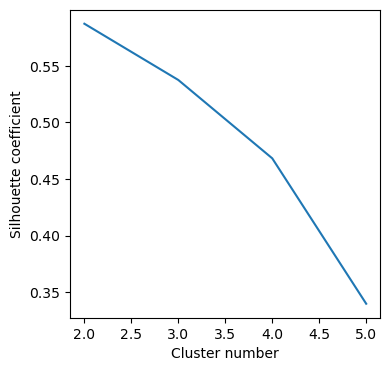

In [22]:
Silhouette_coefficient = []
for i in range(2,6): 
   kmeans_model = KMeans(n_clusters = i, init = "k-means++", n_init='auto')
   kmeans_model.fit(clustering_dataset)
   Silhouette_coefficient.append(metrics.silhouette_score(clustering_dataset, kmeans_model.labels_))
print(Silhouette_coefficient)
plt.figure(figsize=(4,4))
plt.plot(range(2,6), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

___We can see on this silhouette score plot that the more clusters there are the less efficient the clustering will be. Therefore, we decided to create only 2 clusters as it seems to be the best option.___

C:\Users\lilam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lilam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


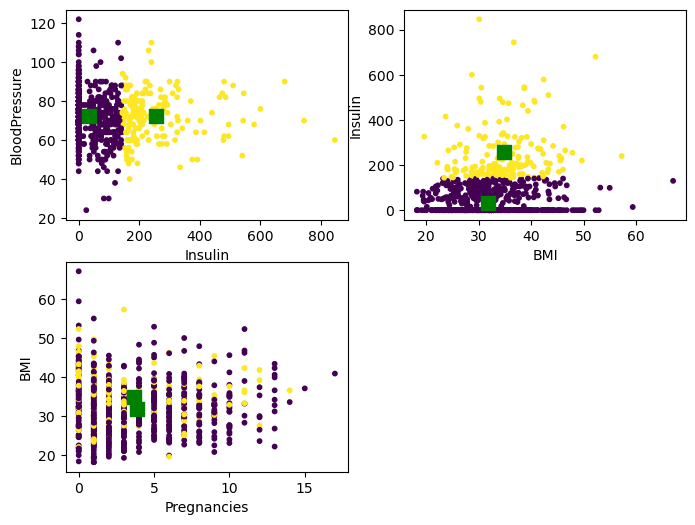

In [23]:
import matplotlib.pyplot as plt
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_dataset)
centroids = kmeans_model.cluster_centers_
y_pred = kmeans_model.predict(clustering_dataset)
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)                            
plt.scatter(clustering_dataset['Insulin'], clustering_dataset['BloodPressure'], s = 10, c = y_pred)
plt.scatter(centroids[0,4], centroids[0,2], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,4], centroids[1,2], s = 100, c = 'g', marker = 's')
plt.xlabel(clustering_dataset.columns[4])
plt.ylabel(clustering_dataset.columns[2])
plt.subplot(2,2,2)                           
plt.scatter(clustering_dataset['BMI'], clustering_dataset['Insulin'], s = 10, c = y_pred)
plt.scatter(centroids[0,5], centroids[0,4], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,5], centroids[1,4], s = 100, c = 'g', marker = 's')
plt.xlabel(clustering_dataset.columns[5])
plt.ylabel(clustering_dataset.columns[4])
plt.subplot(2,2,3)                            
plt.scatter(clustering_dataset['Pregnancies'], clustering_dataset['BMI'], s = 10, c = y_pred)
plt.scatter(centroids[0,0], centroids[0,5], s = 100, c = 'g', marker = 's')
plt.scatter(centroids[1,0], centroids[1,5], s = 100, c = 'g', marker = 's')
plt.xlabel(clustering_dataset.columns[0])
plt.ylabel(clustering_dataset.columns[5])
plt.show()

We can see on the KMeans clustering plots the two different clusters created by the algorithm. We also see that depending on the axes, the clusters are more or less seperated

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Artificial Neural Networks

1st model: 2 hidden layers with 32 neurons in each, learning rate is equal to 0.05

In [24]:
# library import for splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# separate target labels from the dataset
targets = my_dataset['Outcome']
# how much percentage of the dataset will be used for training
training_proportion = 0.7
# splitting the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1-training_proportion, random_state=42)
model_1 = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_1.fit(X_train, y_train)

Iteration 1, loss = 0.64850417
Iteration 2, loss = 0.64642009
Iteration 3, loss = 0.64587851
Iteration 4, loss = 0.64544860
Iteration 5, loss = 0.64498820
Iteration 6, loss = 0.64640842
Iteration 7, loss = 0.64369934
Iteration 8, loss = 0.64243157
Iteration 9, loss = 0.64243194
Iteration 10, loss = 0.64172709
Iteration 11, loss = 0.64056986
Iteration 12, loss = 0.63970912
Iteration 13, loss = 0.63872644
Iteration 14, loss = 0.63767013
Iteration 15, loss = 0.63731203
Iteration 16, loss = 0.63538068
Iteration 17, loss = 0.63396803
Iteration 18, loss = 0.63280555
Iteration 19, loss = 0.63060545
Iteration 20, loss = 0.62921410
Iteration 21, loss = 0.62745622
Iteration 22, loss = 0.62519683
Iteration 23, loss = 0.62473975
Iteration 24, loss = 0.62092140
Iteration 25, loss = 0.61887330
Iteration 26, loss = 0.61731113
Iteration 27, loss = 0.61401258
Iteration 28, loss = 0.61230297
Iteration 29, loss = 0.60835966
Iteration 30, loss = 0.60704204
Iteration 31, loss = 0.60281286
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 32),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

####Performance analysis

In [25]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
y_predictions_1 = model.predict(X_test)
print(classification_report(y_test, y_predictions_1, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_1)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

NameError: name 'model' is not defined

#### The confusion matrix shows that 46 data objects with label 1 was mistakenly classified as 0, and 21 data objects with label 1 was classified as 0. In total: 67 out of 231 data objects were misclassified: overall accuracy 71%. 

2nd model: hidden layers sizes are icreased up to 86 neurons each

In [26]:
model_2 = MLPClassifier(hidden_layer_sizes=(86,86), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_2.fit(X_train, y_train)

Iteration 1, loss = 0.65168641
Iteration 2, loss = 0.65084665
Iteration 3, loss = 0.64439645
Iteration 4, loss = 0.64438347
Iteration 5, loss = 0.64310604
Iteration 6, loss = 0.63880532
Iteration 7, loss = 0.63635316
Iteration 8, loss = 0.63440665
Iteration 9, loss = 0.63308034
Iteration 10, loss = 0.62780986
Iteration 11, loss = 0.62404016
Iteration 12, loss = 0.62308820
Iteration 13, loss = 0.62114639
Iteration 14, loss = 0.61236958
Iteration 15, loss = 0.60837411
Iteration 16, loss = 0.60534694
Iteration 17, loss = 0.60652344
Iteration 18, loss = 0.60600142
Iteration 19, loss = 0.59520363
Iteration 20, loss = 0.58940357
Iteration 21, loss = 0.58873294
Iteration 22, loss = 0.58249610
Iteration 23, loss = 0.57787735
Iteration 24, loss = 0.57464432
Iteration 25, loss = 0.58535781
Iteration 26, loss = 0.58114080
Iteration 27, loss = 0.56940240
Iteration 28, loss = 0.57357837
Iteration 29, loss = 0.56515712
Iteration 30, loss = 0.56740195
Iteration 31, loss = 0.56074986
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(86, 86),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



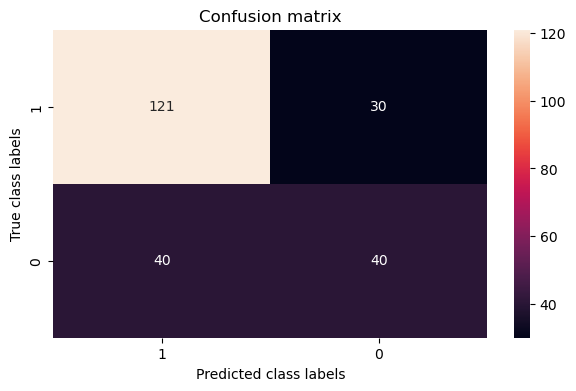

In [27]:
y_predictions_2 = model_2.predict(X_test)
print(classification_report(y_test, y_predictions_2, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_2)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

#### The accuracy of the second model is only 68%: this model overfits the training data due to the too large number of neurons

3rd model: one hidden layer with 64 neurons, learning rate is 0.01

In [28]:
model_3 = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.1, verbose=1)
model_3.fit(X_train, y_train)

Iteration 1, loss = 0.65630486
Iteration 2, loss = 0.61721658
Iteration 3, loss = 0.61585261
Iteration 4, loss = 0.62894167
Iteration 5, loss = 0.60597228
Iteration 6, loss = 0.59676531
Iteration 7, loss = 0.63235384
Iteration 8, loss = 0.60316954
Iteration 9, loss = 0.60361850
Iteration 10, loss = 0.60770715
Iteration 11, loss = 0.62060794
Iteration 12, loss = 0.61287257
Iteration 13, loss = 0.60398474
Iteration 14, loss = 0.61711984
Iteration 15, loss = 0.60355978
Iteration 16, loss = 0.60967053
Iteration 17, loss = 0.58743174
Iteration 18, loss = 0.59131336
Iteration 19, loss = 0.64185649
Iteration 20, loss = 0.61708695
Iteration 21, loss = 0.60227205
Iteration 22, loss = 0.60585641
Iteration 23, loss = 0.58627672
Iteration 24, loss = 0.59922656
Iteration 25, loss = 0.61051418
Iteration 26, loss = 0.57729082
Iteration 27, loss = 0.61870566
Iteration 28, loss = 0.58070142
Iteration 29, loss = 0.59323212
Iteration 30, loss = 0.58892315
Iteration 31, loss = 0.58436538
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=64,
              learning_rate_init=0.1, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       151
           1       0.67      0.12      0.21        80

    accuracy                           0.68       231
   macro avg       0.67      0.55      0.50       231
weighted avg       0.67      0.68      0.59       231



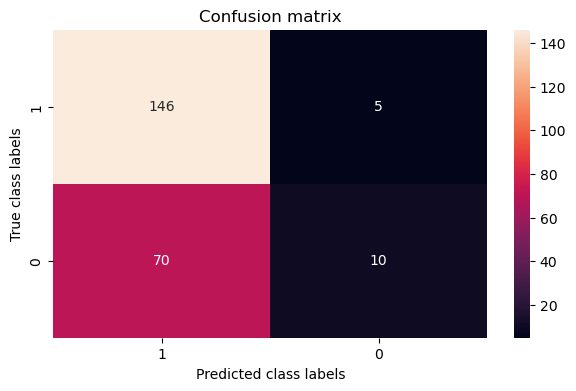

In [29]:
y_predictions_3 = model_3.predict(X_test)
print(classification_report(y_test, y_predictions_3, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_3)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is only 65%: learning rate is too high in this model

model 4: one hidden layer with 32 neurons, learning rate is 0.02

In [30]:
model_4 = MLPClassifier(hidden_layer_sizes=(32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.02, verbose=1)
model_4.fit(X_train, y_train)

Iteration 1, loss = 0.68429198
Iteration 2, loss = 0.62289081
Iteration 3, loss = 0.61462511
Iteration 4, loss = 0.61112109
Iteration 5, loss = 0.60419996
Iteration 6, loss = 0.60551707
Iteration 7, loss = 0.59820435
Iteration 8, loss = 0.59632779
Iteration 9, loss = 0.59284381
Iteration 10, loss = 0.58950277
Iteration 11, loss = 0.58564774
Iteration 12, loss = 0.58403917
Iteration 13, loss = 0.58112948
Iteration 14, loss = 0.57959626
Iteration 15, loss = 0.57702958
Iteration 16, loss = 0.57489747
Iteration 17, loss = 0.57641394
Iteration 18, loss = 0.57452511
Iteration 19, loss = 0.56911399
Iteration 20, loss = 0.57490018
Iteration 21, loss = 0.56962781
Iteration 22, loss = 0.56090385
Iteration 23, loss = 0.56365487
Iteration 24, loss = 0.56318131
Iteration 25, loss = 0.55841026
Iteration 26, loss = 0.56333435
Iteration 27, loss = 0.55952354
Iteration 28, loss = 0.55664621
Iteration 29, loss = 0.56483634
Iteration 30, loss = 0.56010815
Iteration 31, loss = 0.55172471
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=32,
              learning_rate_init=0.02, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       151
           1       0.60      0.44      0.51        80

    accuracy                           0.71       231
   macro avg       0.67      0.64      0.65       231
weighted avg       0.69      0.71      0.69       231

[[128  23]
 [ 45  35]]


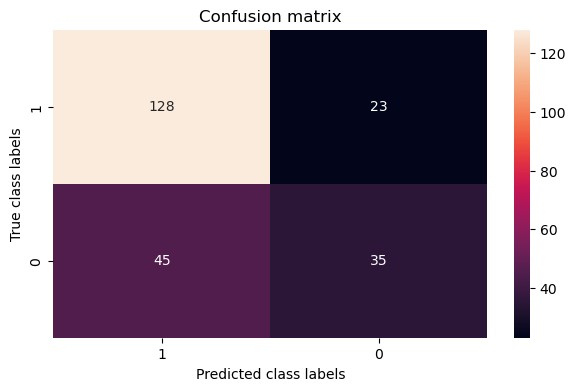

In [31]:
y_predictions_4 = model_4.predict(X_test)
print(classification_report(y_test, y_predictions_4, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_4)
print(conf_matrix)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is 70%, it performed slightly worse then the first one. Therefore, after conducted experiments the first model is declared as the most accurate and reliable model out of 4 models tested. 

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Gradient Boosting Algorithm

### Model 1

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score 

In [33]:
targetsGB = my_dataset['Outcome']
training_proportionGB = 0.7
X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(clustering_dataset, targetsGB, test_size=1-training_proportionGB, random_state=42)

In [58]:
modelGB = GradientBoostingClassifier(n_estimators=5000,
                                     learning_rate=0.05,
                                     max_depth=3,
                                     subsample=0.5,
                                     validation_fraction=0.1,
                                     n_iter_no_change=20,
                                     max_features='log2', 
                                     verbose=1, 
                                     random_state=42
                                    )
modelGB.fit(X_trainGB, y_trainGB)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2658           0.0297           19.76s
         2           1.2253           0.0139           17.37s
         3           1.2231           0.0470           16.74s
         4           1.2191           0.0524           16.30s
         5           1.1425          -0.0436           17.02s
         6           1.1691           0.0721           17.51s
         7           1.1308           0.0082           17.09s
         8           1.0899          -0.0103           16.88s
         9           1.1266           0.0607           17.21s
        10           1.1060           0.0117           17.49s
        20           0.9416          -0.0035           13.96s
        30           0.8705           0.0364           12.26s
        40           0.8348           0.0538           11.40s
        50           0.7741           0.0502           11.58s
        60           0.7655          -0.0019           11.53s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=20,
                           random_state=42, subsample=0.5, verbose=1)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



0.7272727272727273

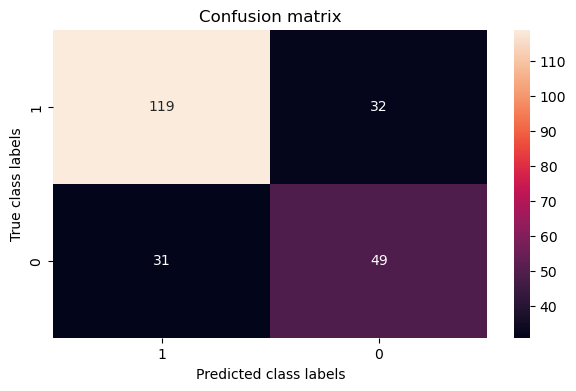

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
y_predictions_1GB = modelGB.predict(X_testGB)
print(classification_report(y_testGB, y_predictions_1GB, zero_division=0))
conf_matrix = confusion_matrix(y_testGB, y_predictions_1GB)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testGB, y_predictions_1GB)

__The accuracy for this model is equal to 0.727 %.__

&nbsp;

### Model 2

In [60]:
modelGB2 = GradientBoostingClassifier(n_estimators=4000,
                                     learning_rate=0.08,
                                     max_depth=8,
                                     subsample=0.5,
                                     validation_fraction=0.1,
                                     n_iter_no_change=20,
                                     max_features='log2', 
                                     verbose=1, 
                                     random_state=42)
modelGB2.fit(X_trainGB, y_trainGB)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1995           0.0454           32.33s
         2           1.0864           0.0507           35.96s
         3           1.0265           0.0854           42.77s
         4           0.9880           0.0938           42.05s
         5           0.9269           0.0390           39.95s
         6           0.8790           0.0686           40.67s
         7           0.8275           0.0479           39.98s
         8           0.7591           0.0042           39.46s
         9           0.7740           0.0819           37.73s
        10           0.7276           0.0255           36.74s
        20           0.4686           0.0005           31.26s
        30           0.3382           0.0327           29.38s
        40           0.2734           0.0119           27.43s
        50           0.2012           0.0109           26.55s
        60           0.1694          -0.0053           26.08s


GradientBoostingClassifier(learning_rate=0.08, max_depth=8, max_features='log2',
                           n_estimators=4000, n_iter_no_change=20,
                           random_state=42, subsample=0.5, verbose=1)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



0.7619047619047619

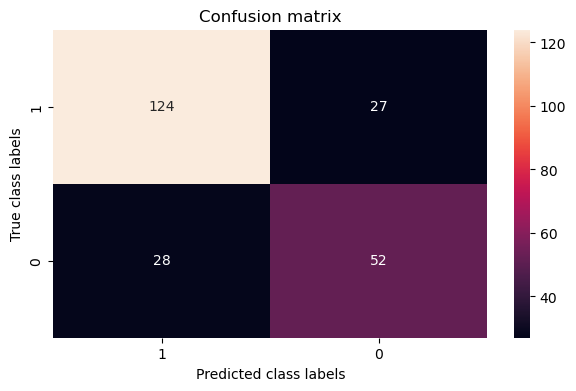

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_2GB = modelGB2.predict(X_testGB)
print(classification_report(y_testGB, y_predictions_2GB, zero_division=0))
conf_matrix = confusion_matrix(y_testGB, y_predictions_2GB)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testGB, y_predictions_2GB)

__The accuracy for this model is equal to 0.761 %.__

&nbsp;

### Model 3

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5067           0.1146           66.51m
         2           0.3146          -0.2330           74.85m
         3           0.2889          -0.1168           60.74m
         4           0.2571          -5.8738           58.03m
         5           0.1644          -3.4648           53.23m
         6           0.0188       -2730.0146           52.70m
         7           0.0633          -0.0136           49.82m
         8           0.1620           0.0654           49.84m
         9           0.0031          -0.0398           48.16m
        10           0.0827          -0.0874           48.27m
        20           0.0277          -0.0411           39.97m
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       151
           1       0.58      0.45      0.51        80

    accuracy                           0.70       231
   macro avg       0.66      0.64    

0.696969696969697

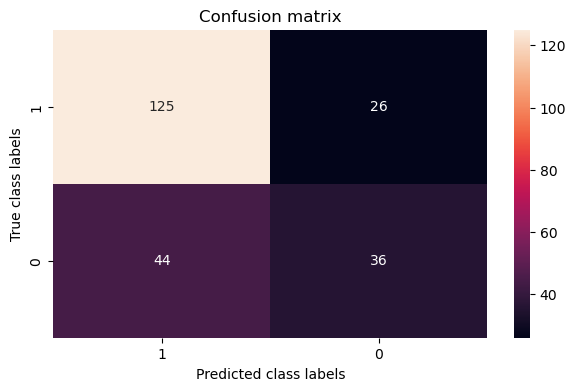

In [62]:
modelGB3 = GradientBoostingClassifier(n_estimators=1000000,
                                     learning_rate=0.56,
                                     max_depth=8,
                                     subsample=0.1,
                                     validation_fraction=0.9,
                                     n_iter_no_change=20,
                                     max_features= 'log2', 
                                     verbose=1, 
                                     random_state=42)
modelGB3.fit(X_trainGB, y_trainGB)

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_3GB = modelGB3.predict(X_testGB)
print(classification_report(y_testGB, y_predictions_3GB, zero_division=0))
conf_matrix = confusion_matrix(y_testGB, y_predictions_3GB)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testGB, y_predictions_3GB)

__The accuracy for this model is equal to 0.696 %.__

#### We can conclude that the best model for Gradient Boosting Algorithm was the second one with 0.761 % of accuracy.

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Random Forest Algorithm

### Model 1 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
training_proportionRF=0.7
targetsRF=my_dataset['Outcome']
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(clustering_dataset, targetsRF, test_size=1-training_proportionRF, random_state=42)

In [56]:
from sklearn import metrics
modelRF = RandomForestClassifier(n_estimators=1000, max_features='sqrt', max_depth=6, min_samples_split=0.2, min_samples_leaf=5, bootstrap=True, random_state=42)
modelRF.fit(X_trainRF, y_trainRF)

RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=0.2,
                       n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.55      0.61        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



0.7575757575757576

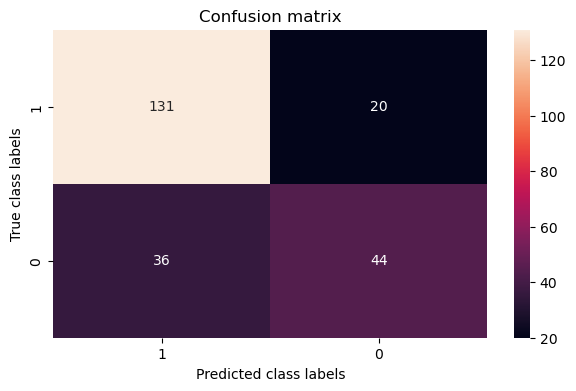

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_1RF = modelRF.predict(X_testRF)
print(classification_report(y_testRF, y_predictions_1RF, zero_division=0))
conf_matrix = confusion_matrix(y_testRF, y_predictions_1RF)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testRF, y_predictions_1RF)

__The accuracy for this model is equal to 0.757 %.__

&nbsp;

### Model 2

In [50]:
from sklearn import metrics
model2RF = RandomForestClassifier(n_estimators=1000, max_features='sqrt', max_depth=4, min_samples_split=0.05, min_samples_leaf=3, bootstrap=True, random_state=42)
model2RF.fit(X_trainRF, y_trainRF)

RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=0.05,
                       n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       151
           1       0.70      0.57      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



0.7662337662337663

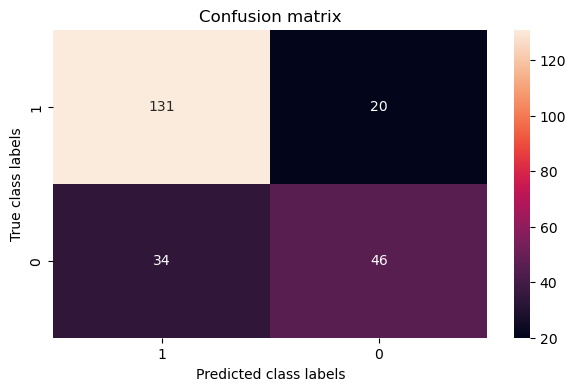

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_2RF = model2RF.predict(X_testRF)
print(classification_report(y_testRF, y_predictions_2RF, zero_division=0))
conf_matrix = confusion_matrix(y_testRF, y_predictions_2RF)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testRF, y_predictions_2RF)

__The accuracy for this model is equal to 0.766 %.__

&nbsp;

### Model 3

In [48]:
model3RF = RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth=5, min_samples_split=0.8, min_samples_leaf=8, bootstrap=True, random_state=42)
model3RF.fit(X_trainRF, y_trainRF)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=8,
                       min_samples_split=0.8, n_estimators=1000,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       151
           1       0.00      0.00      0.00        80

    accuracy                           0.65       231
   macro avg       0.33      0.50      0.40       231
weighted avg       0.43      0.65      0.52       231



0.6536796536796536

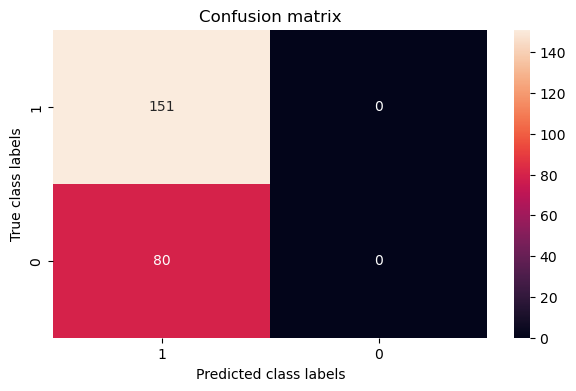

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
from sklearn import metrics
y_predictions_3RF = model3RF.predict(X_testRF)
print(classification_report(y_testRF, y_predictions_3RF, zero_division=0))
conf_matrix = confusion_matrix(y_testRF, y_predictions_3RF)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());
metrics.accuracy_score(y_testRF, y_predictions_3RF)

__The accuracy for this model is equal to 0.653 %.__

#### We can then conclude that the best model for the Random Forest Algorithm was the second one with 0.766% of accuracy. 